# Comprehensive Machine Learning Tutorial: Boston Housing Price Prediction

This tutorial walks through the complete process of building machine learning models to predict housing prices using the famous Boston Housing dataset. We'll cover each step in detail, from data exploration to model evaluation.


## Table of Contents
1. [Introduction](#introduction)
2. [Dataset Overview](#dataset-overview)
3. [Loading and Preparing the Data](#loading-and-preparing-the-data)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Statistical Summary](#statistical-summary)
    - [Data Visualization](#data-visualization)
    - [Distribution Analysis](#distribution-analysis)
    - [Correlation Analysis](#correlation-analysis)
5. [Data Preprocessing](#data-preprocessing)
    - [Handling Missing Values](#handling-missing-values)
    - [Feature Scaling](#feature-scaling)
    - [Train-Test Split](#train-test-split)
6. [Model Training](#model-training)
    - [Linear Regression](#linear-regression)
    - [Random Forest Regressor](#random-forest-regressor)
    - [Gradient Boosting Regressor](#gradient-boosting-regressor)
7. [Model Evaluation](#model-evaluation)
    - [Performance Metrics](#performance-metrics)
    - [Comparing Model Performance](#comparing-model-performance)
8. [Feature Importance Analysis](#feature-importance-analysis)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Final Model Selection](#final-model-selection)
11. [Conclusion](#conclusion)


## Introduction

In this tutorial, we'll learn how to build machine learning models to predict housing prices using the famous Boston Housing dataset. This dataset has been widely used in machine learning education and contains information about various features of houses in Boston suburbs along with their median values.

The goal of this tutorial is to provide beginners with a comprehensive understanding of the machine learning pipeline, from data exploration to model evaluation. We'll focus on explaining each step in detail, providing the rationale behind our decisions, and interpreting the results.

## Dataset Overview

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in Boston, Massachusetts. It was originally published in 1978 and has been widely used for benchmarking machine learning algorithms. The dataset contains 506 instances with 13 features and a target variable (median house value).

Here's a description of the features:

1. **CRIM**: Per capita crime rate by town
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: Proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX**: Nitric oxides concentration (parts per 10 million)
6. **RM**: Average number of rooms per dwelling
7. **AGE**: Proportion of owner-occupied units built prior to 1940
8. **DIS**: Weighted distances to five Boston employment centers
9. **RAD**: Index of accessibility to radial highways
10. **TAX**: Full-value property-tax rate per $10,000
11. **PTRATIO**: Pupil-teacher ratio by town
12. **B**: 1000(Bk - 0.63)² where Bk is the proportion of Black residents by town
13. **LSTAT**: % lower status of the population

**Target Variable**:
- **MEDV**: Median value of owner-occupied homes in $1000's

## Loading and Preparing the Data

First, let's import the necessary libraries and load the dataset:

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
# Load the Boston Housing dataset
df = pd.read_csv("tp3_boston_data.csv")

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (506, 13)

First 5 rows of the dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


This code loads the Boston Housing dataset and creates a pandas DataFrame, which will make our data exploration and manipulation easier. We also add the target variable 'MEDV' (median house value) to the DataFrame.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a critical step in any machine learning project. It helps us understand the data, identify patterns, detect anomalies, and form hypotheses that we can test with our models. Good EDA can lead to better feature engineering and ultimately more accurate models.

### Statistical Summary

Let's start by examining the basic statistics of our dataset:

In [5]:
# Get a summary of the dataset
print("Basic statistics of the dataset:")
df.describe()

Basic statistics of the dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


The `describe()` function provides us with key statistics for each feature:
- **count**: Number of non-null values
- **mean**: The average value
- **std**: Standard deviation, indicating the spread of the data
- **min**: Minimum value
- **25%**: First quartile (25th percentile)
- **50%**: Median (50th percentile)
- **75%**: Third quartile (75th percentile)
- **max**: Maximum value

This gives us our first look at the distribution of values across each feature. For example, we can see the range of house prices (MEDV), the variation in crime rates (CRIM), and the distribution of room numbers (RM).

We also check for missing values, which is important because many machine learning algorithms cannot handle missing data directly. Fortunately, the Boston Housing dataset is typically clean and does not contain missing values.

### Data Visualization

Visualizing our data can provide insights that might not be apparent from numerical summaries. Let's create some visualizations to better understand our dataset:

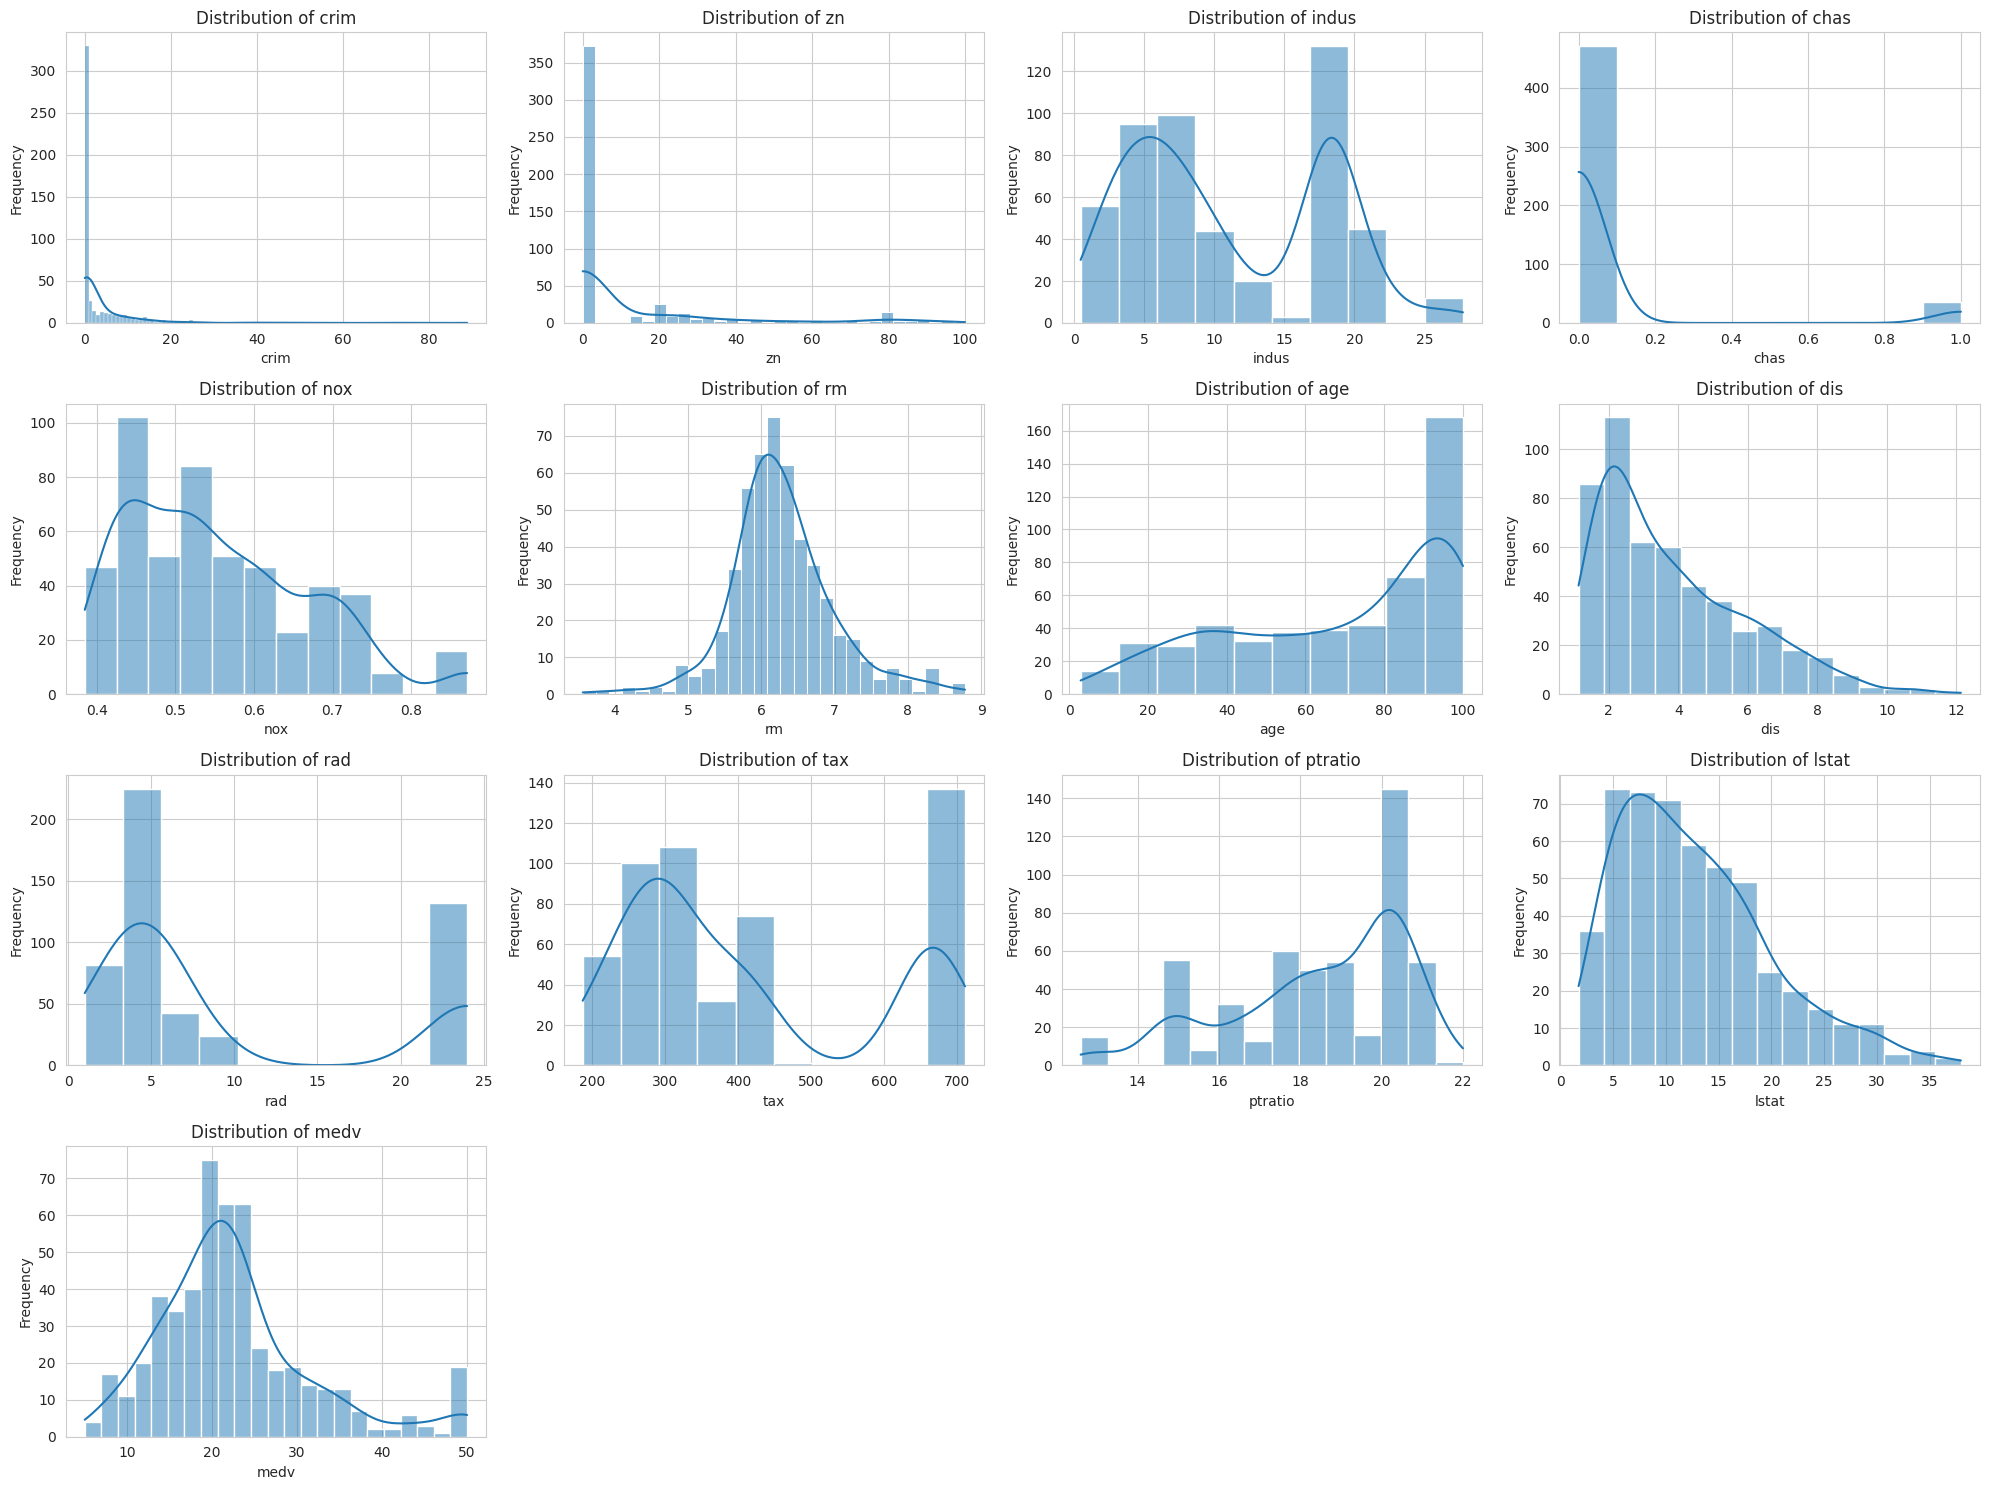

In [7]:
# Create a function to plot histograms for all features
def plot_histograms(dataframe, columns, rows=4, cols=4, figsize=(20, 15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.histplot(dataframe[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {column}', fontsize=12)
            axes[i].set_xlabel(column, fontsize=10)
            axes[i].set_ylabel('Frequency', fontsize=10)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Plot histograms for all features
plot_histograms(df, df.columns)

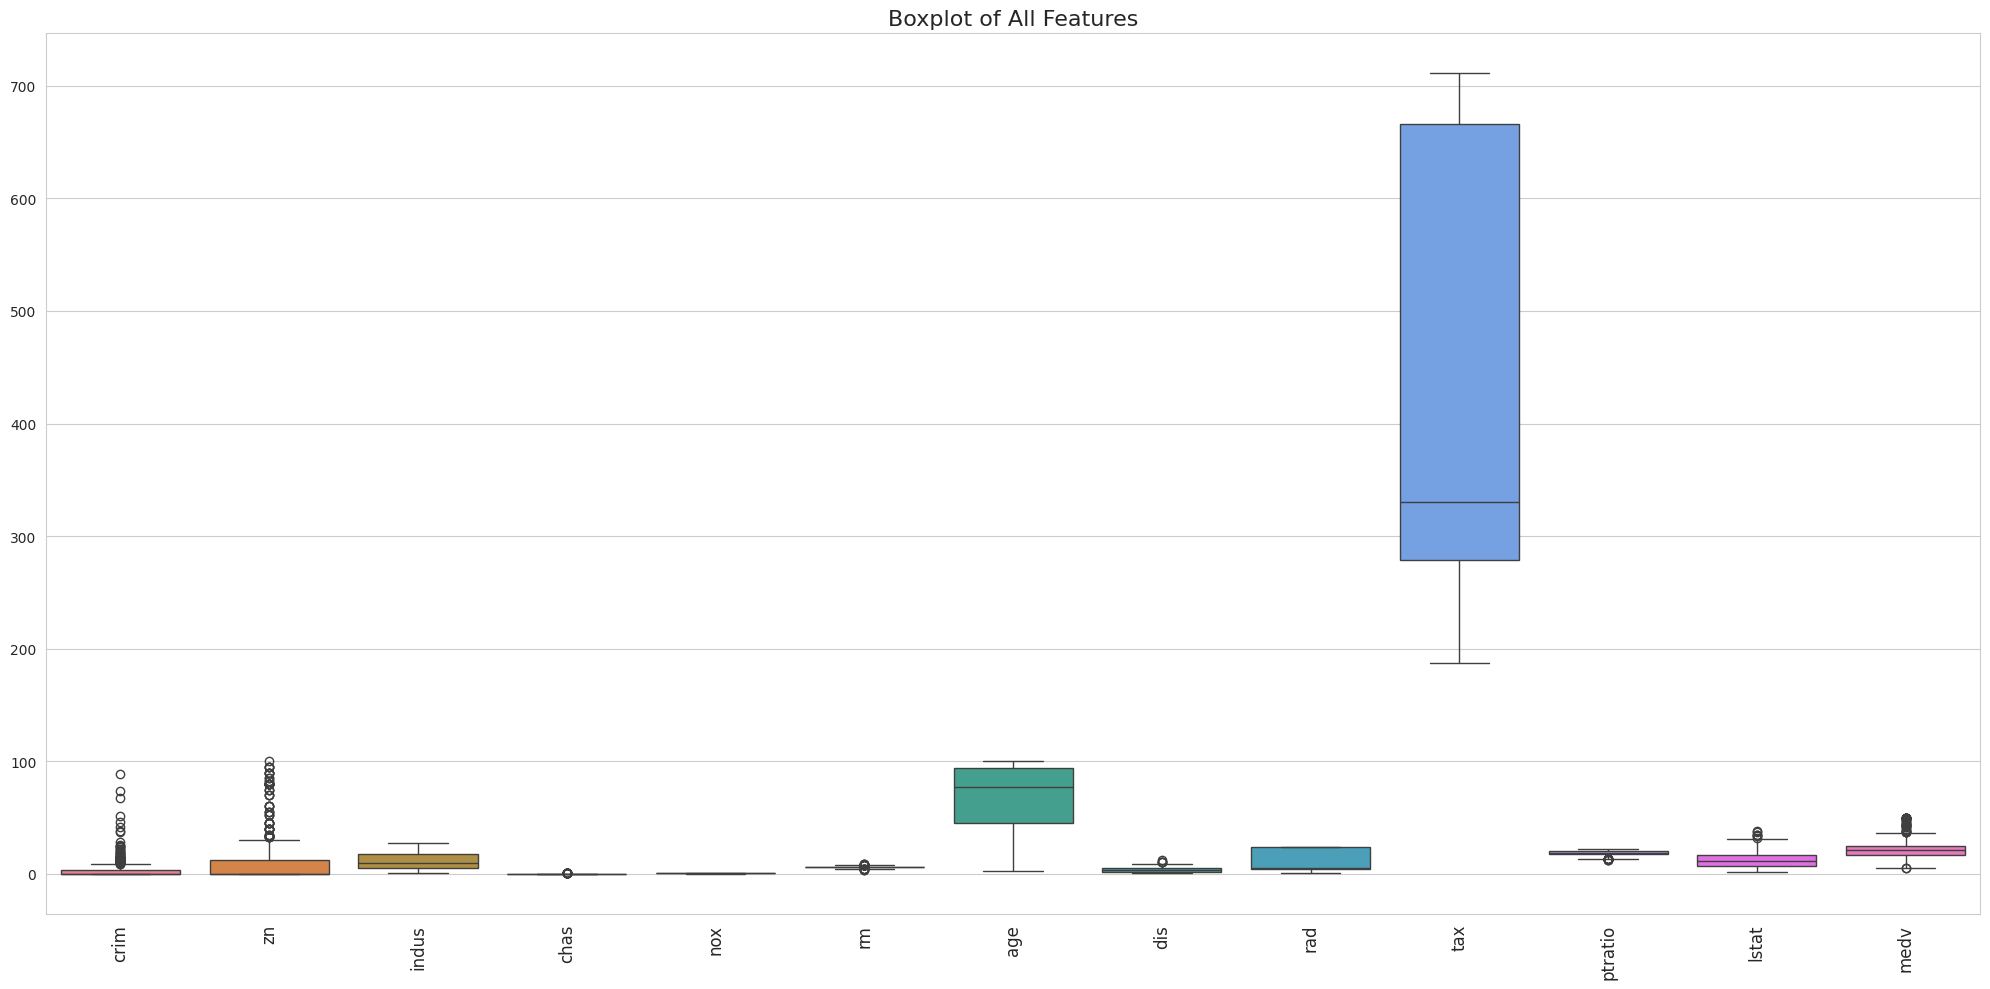

In [8]:
# Create a boxplot for each feature to identify outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot of All Features', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

#### Histograms
Histograms show the distribution of each feature. When examining these distributions, we should look for:
- **Skewness**: Is the distribution symmetric or skewed to one side?
- **Modality**: Are there one or multiple peaks?
- **Outliers**: Are there values far from the main distribution?

For example, we might observe that:
- CRIM (crime rate) is highly right-skewed, with most areas having low crime rates but a few having very high rates.
- RM (average rooms) might have a more symmetric distribution, possibly with multiple peaks.
- MEDV (house prices) could show a varied distribution with potential outliers at higher values.

#### Boxplots
Boxplots are excellent for identifying outliers. In a boxplot:
- The box represents the interquartile range (IQR) from the 25th to 75th percentile.
- The line in the middle of the box is the median.
- The whiskers extend to 1.5 times the IQR from the box.
- Points beyond the whiskers are potential outliers.

By examining these boxplots, we can identify which features have significant outliers that might need to be addressed during preprocessing.

### Distribution Analysis

Let's take a closer look at the target variable (MEDV) and some key features:

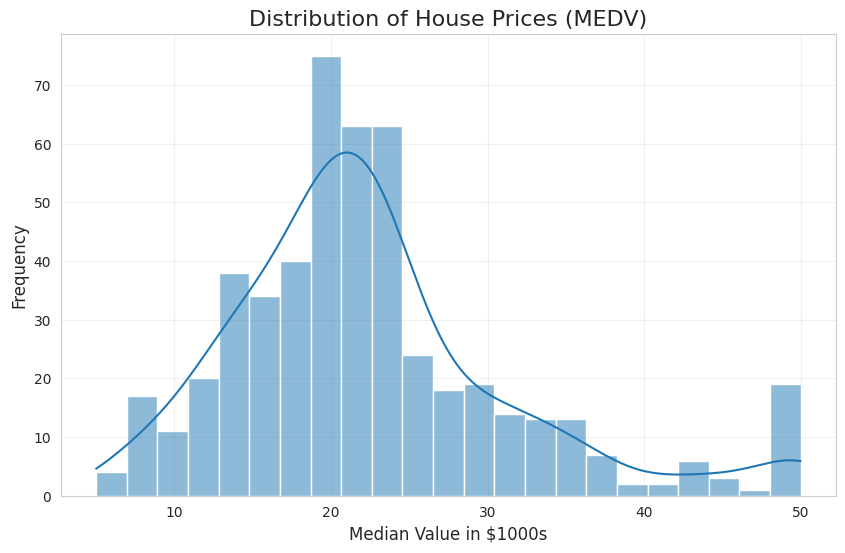


Summary statistics for house prices (MEDV):


,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [11]:
# Analyze the distribution of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of House Prices (MEDV)', fontsize=16)
plt.xlabel('Median Value in $1000s', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics for MEDV
print("\nSummary statistics for house prices (MEDV):")
df['medv'].describe()

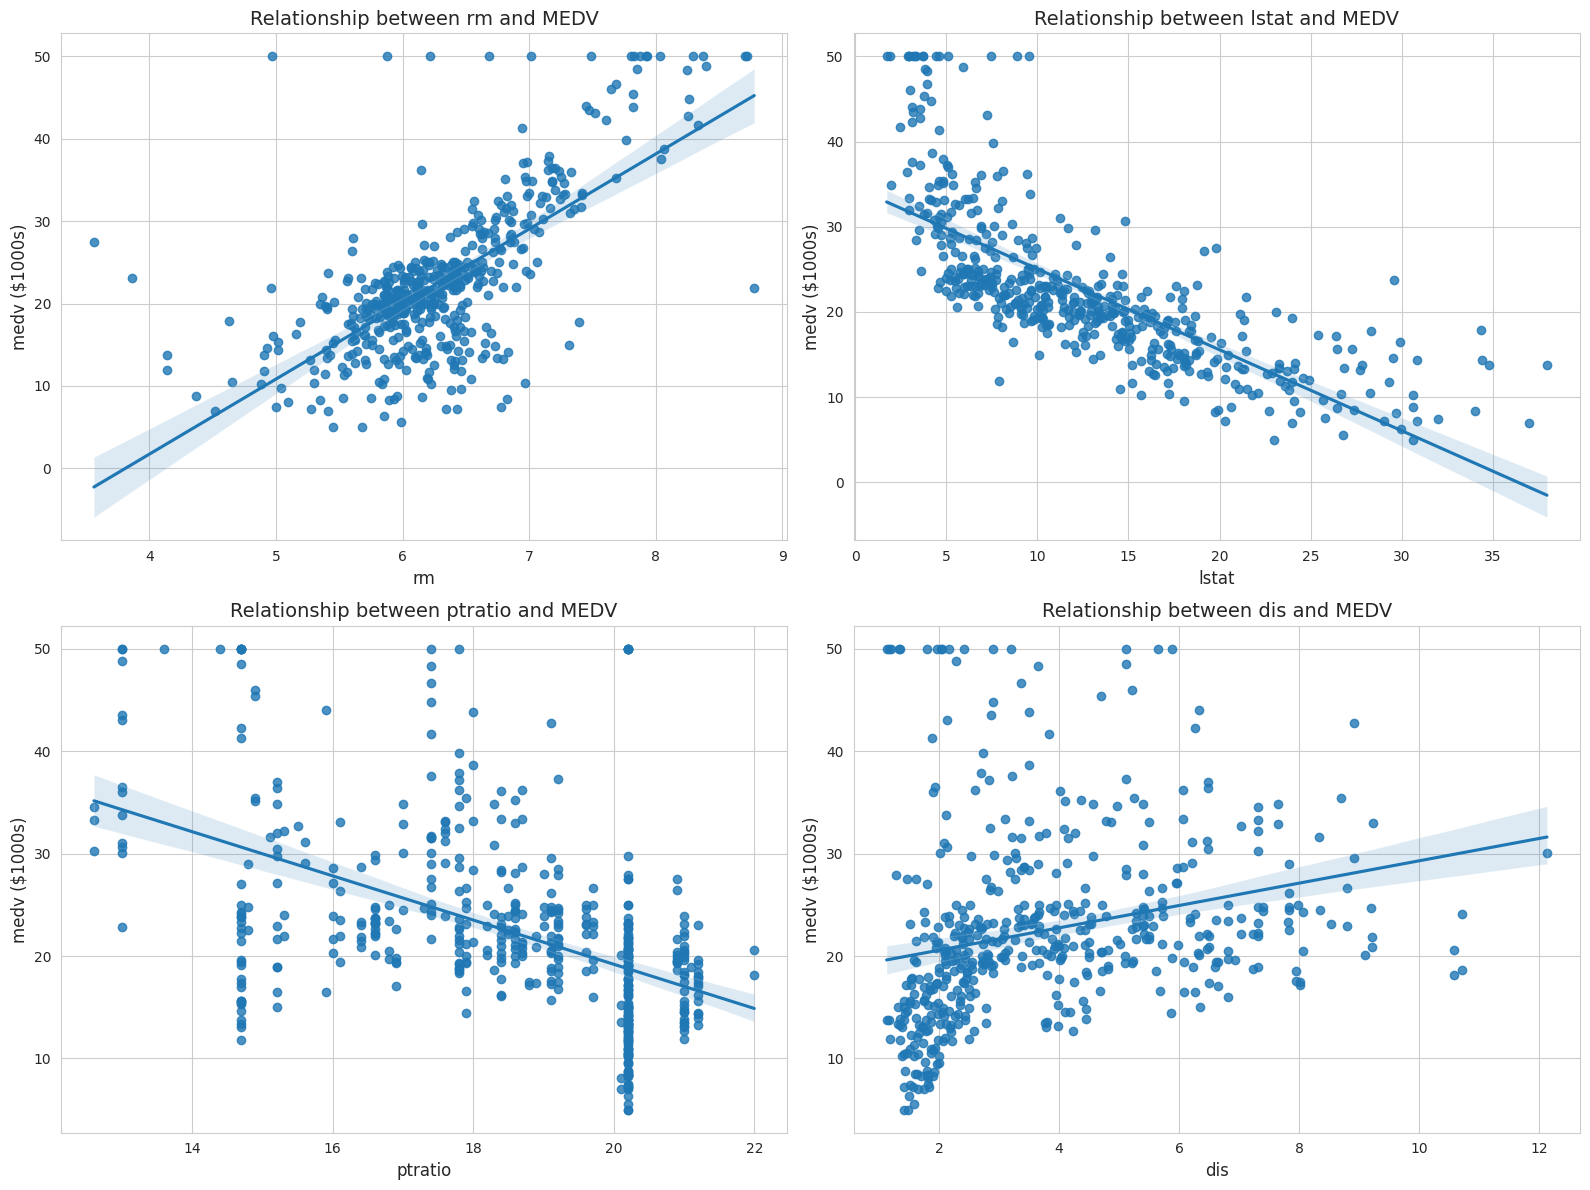

In [14]:
# Plot relationships between key features and target
key_features = ['rm', 'lstat', 'ptratio', 'dis']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.regplot(x=feature, y='medv', data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and MEDV', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('medv ($1000s)', fontsize=12)

plt.tight_layout()
plt.show()

The histogram of MEDV shows the distribution of house prices in the dataset. Understanding this distribution is important because it tells us about the range and frequency of different price points. We might observe:
- The general shape of the distribution (normal, skewed, multimodal)
- Potential presence of outliers
- Price ranges that are most common

For the scatter plots with regression lines, we're examining the relationship between key features and the target variable:
- **RM (average rooms)**: We'd expect a positive correlation with price (more rooms → higher price).
- **LSTAT (% lower status population)**: Likely a negative correlation (higher LSTAT → lower price).
- **PTRATIO (pupil-teacher ratio)**: Possibly a negative correlation (higher ratio → lower price).
- **DIS (distance to employment centers)**: The relationship might be more complex.

These plots help us understand which features have strong relationships with the target variable and whether those relationships are linear or more complex.

### Correlation Analysis

Correlation analysis helps us understand the relationships between different variables. A high correlation between two features might indicate redundancy, while strong correlations with the target variable can identify the most predictive features.

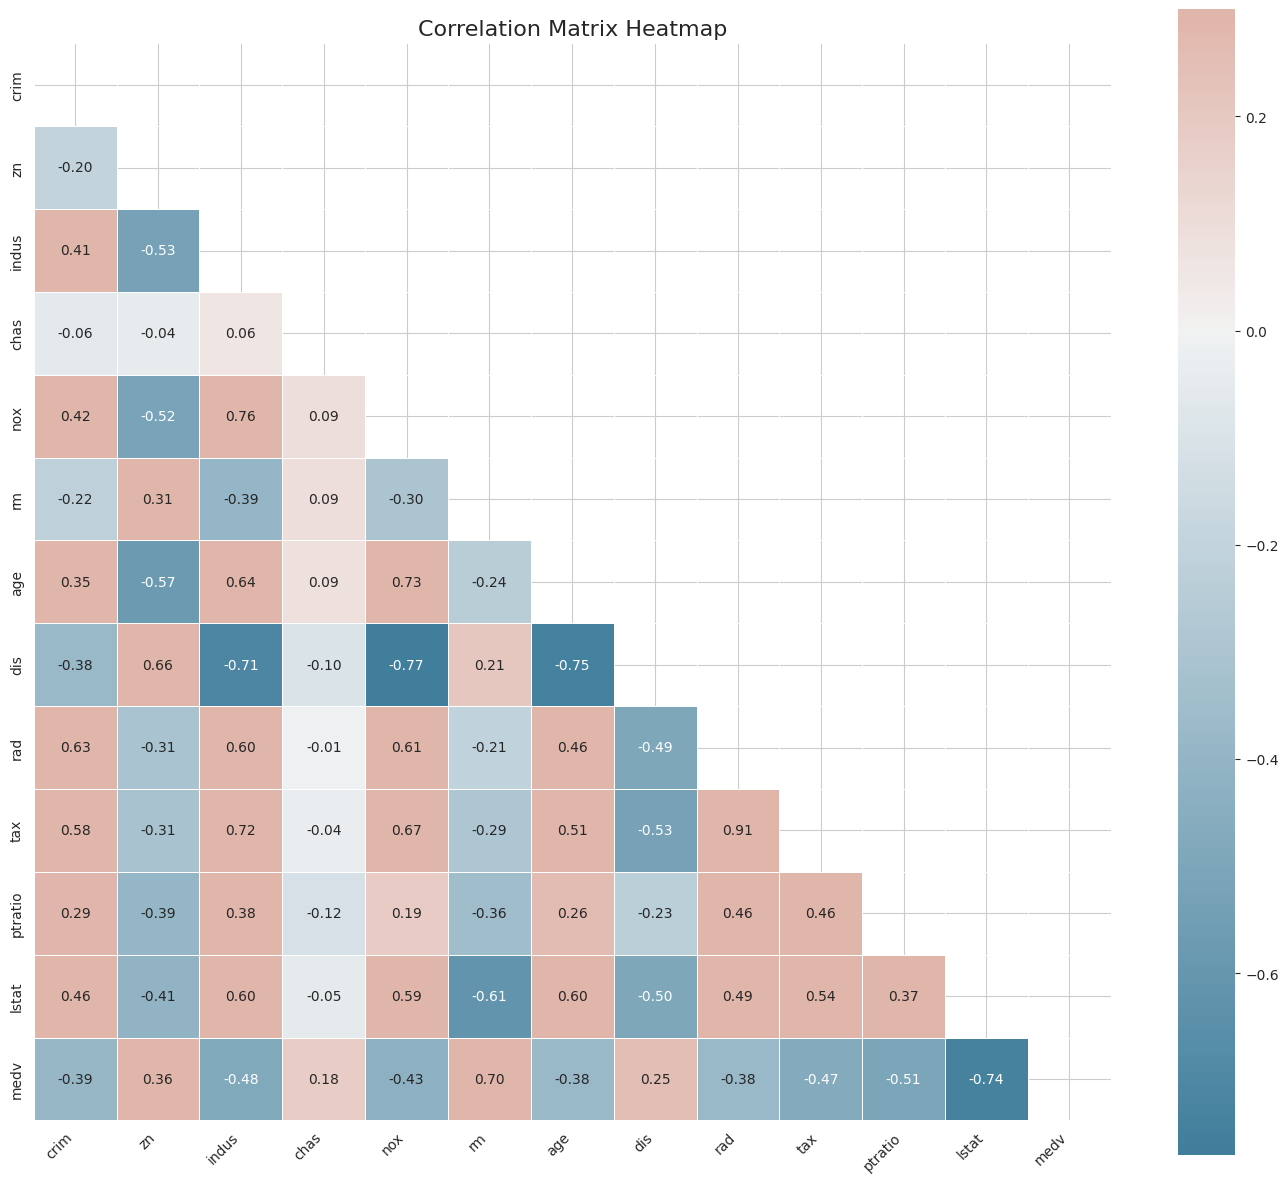

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Print the correlations with the target variable
print("Correlations with medv (sorted):")
corr_matrix['medv'].sort_values(ascending=False)

Correlations with medv (sorted):


,medv
medv,1.000000
rm,0.695360
zn,0.360445
dis,0.249929
chas,0.175260
age,-0.376955
rad,-0.381626
crim,-0.388305
nox,-0.427321
tax,-0.468536


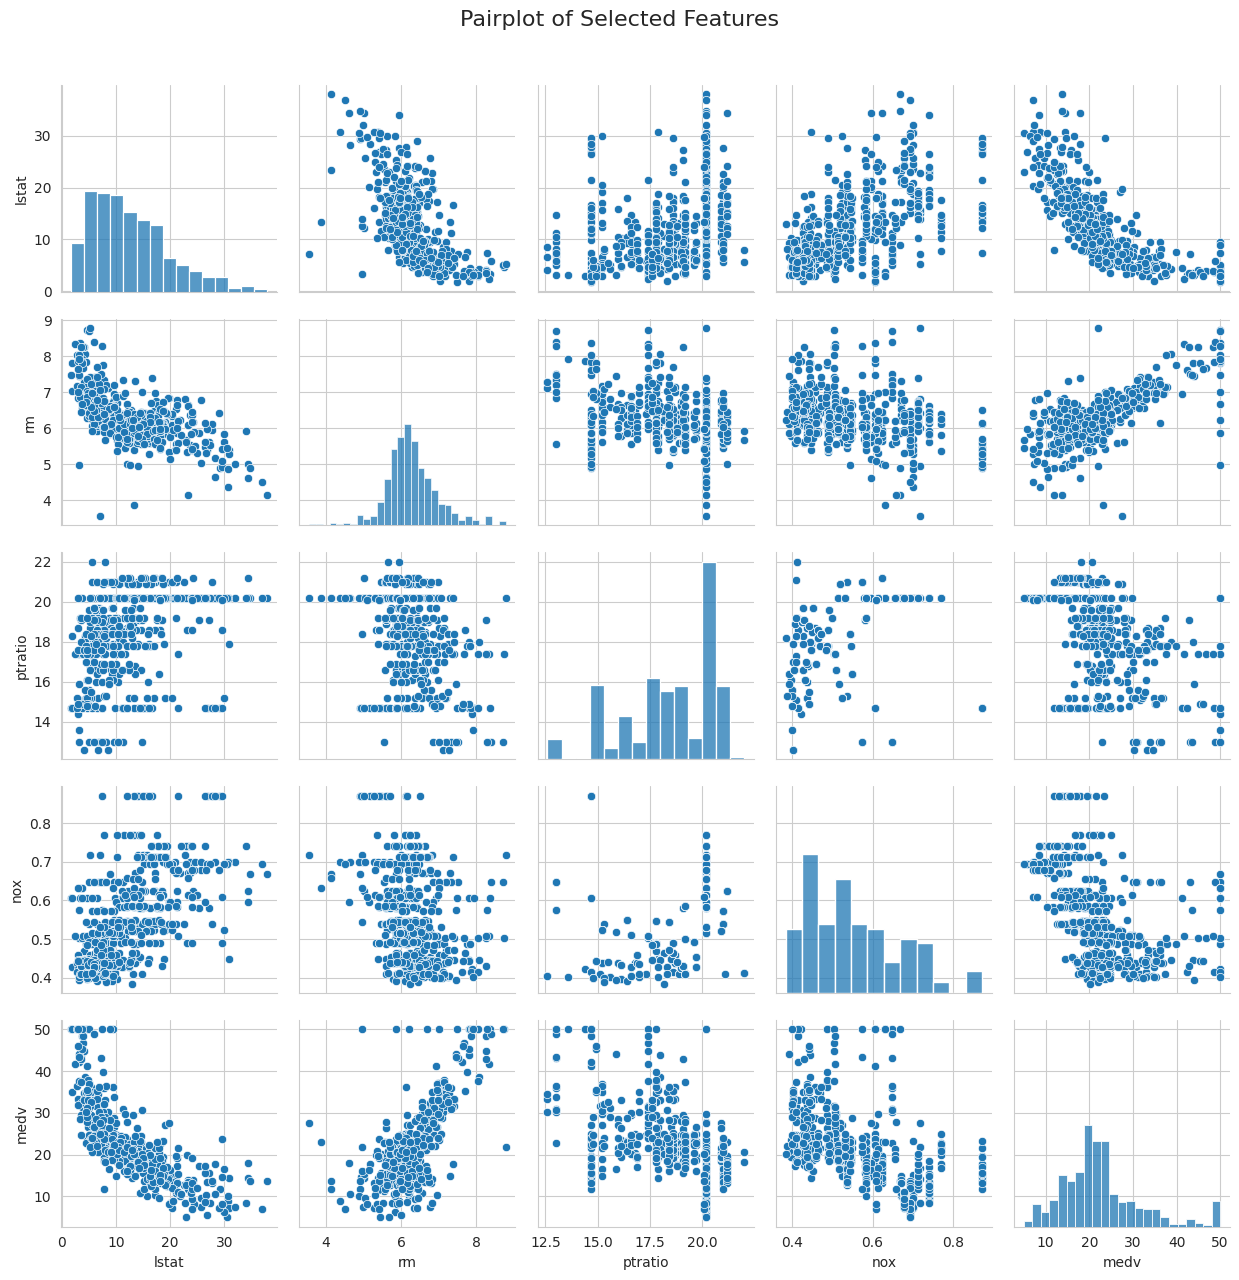

In [18]:
# Pairplot for selected features
selected_features = ['lstat', 'rm', 'ptratio', 'nox', 'medv']
sns.pairplot(df[selected_features], height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Correlation Heatmap
The correlation heatmap visualizes the Pearson correlation coefficients between all pairs of variables:
- Values close to 1 indicate strong positive correlation
- Values close to -1 indicate strong negative correlation
- Values close to 0 indicate little to no linear correlation

Key insights we might observe:
- Strong positive correlation between RM (average rooms) and MEDV (house price)
- Strong negative correlation between LSTAT (lower status population) and MEDV
- Various correlations between different features, which might indicate multicollinearity

#### Correlations with MEDV
By sorting the correlations with MEDV, we can identify the features that have the strongest linear relationships with house prices. This can help us understand which features are most important for our predictive models.

#### Pairplot
The pairplot shows scatterplots for each pair of selected features, along with histograms for each feature on the diagonal. This helps us see:
- Bivariate relationships between all pairs of features
- Distributions of individual features
- Potential non-linear relationships that correlation coefficients might not capture

## Data Preprocessing

Before training our models, we need to preprocess the data. This includes handling missing values, scaling features, and splitting the data into training and testing sets.

### Handling Missing Values

In [19]:
# Check for missing values again
print("Missing values in each column:")
df.isnull().sum()

# If there were missing values, we would handle them here
# For example:
# df = df.fillna(df.mean())  # Fill with mean values
# or
# df = df.dropna()  # Drop rows with missing values

Missing values in each column:


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


As noted earlier, the Boston Housing dataset typically doesn't have missing values. However, checking for missing values is an important step in any data preprocessing pipeline.

### Feature Scaling

Many machine learning algorithms perform better when features are on a similar scale. We'll use StandardScaler to standardize our features.

But note that, this isn't required for all the type of machine learning models.

In [20]:
# Separate features and target
X = df.drop('medv', axis=1)
y = df['medv']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print("First 5 rows of scaled features:")
X_scaled_df.head()

First 5 rows of scaled features:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1. This normalization helps algorithms that are sensitive to feature scales, such as linear regression and gradient descent-based algorithms.

### Train-Test Split

To properly evaluate our models, we need to split the data into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on new, unseen data.

In [21]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Print the shape of the resulting datasets
print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")

Training set shape: X_train (404, 12), y_train (404,)
Testing set shape: X_test (102, 12), y_test (102,)


We use `train_test_split` from scikit-learn to randomly divide our data:
- 80% of the data is used for training
- 20% is reserved for testing
- We set `random_state=42` to ensure reproducibility of results

This split is important because it allows us to evaluate our models on data they haven't seen during training, which gives a more realistic assessment of how they might perform in the real world.

## Model Training

Now we'll train three different regression models on our data:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor

Each model has its own strengths and weaknesses, and comparing them will give us insights into which works best for our particular problem.

### Linear Regression

Linear regression is one of the simplest and most interpretable models. It assumes a linear relationship between the features and the target variable.

In [22]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"R-squared (R²): {lr_r2:.4f}")

Linear Regression Results:
Mean Squared Error (MSE): 22.7777
Root Mean Squared Error (RMSE): 4.7726
Mean Absolute Error (MAE): 3.1114
R-squared (R²): 0.6894


In [23]:
# Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("Linear Regression Coefficients (sorted):")
coefficients

Linear Regression Coefficients (sorted):


,Feature,Coefficient
5,rm,2.976220
8,rad,2.087593
3,chas,0.773783
1,zn,0.717516
2,indus,0.173037
6,age,-0.101078
0,crim,-1.093000
9,tax,-1.898418
10,ptratio,-1.935375
4,nox,-2.104949


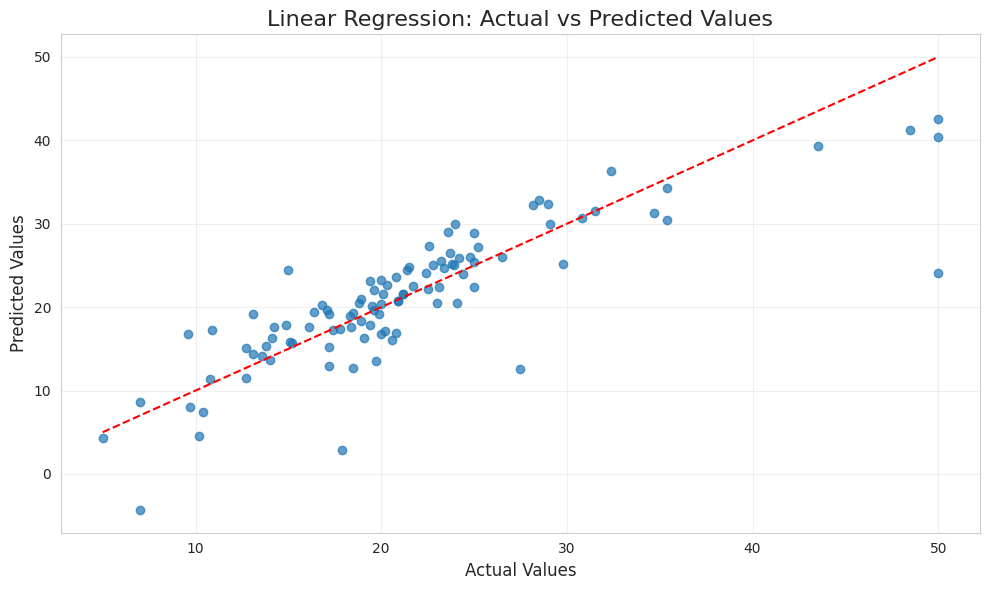

In [24]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted Values', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

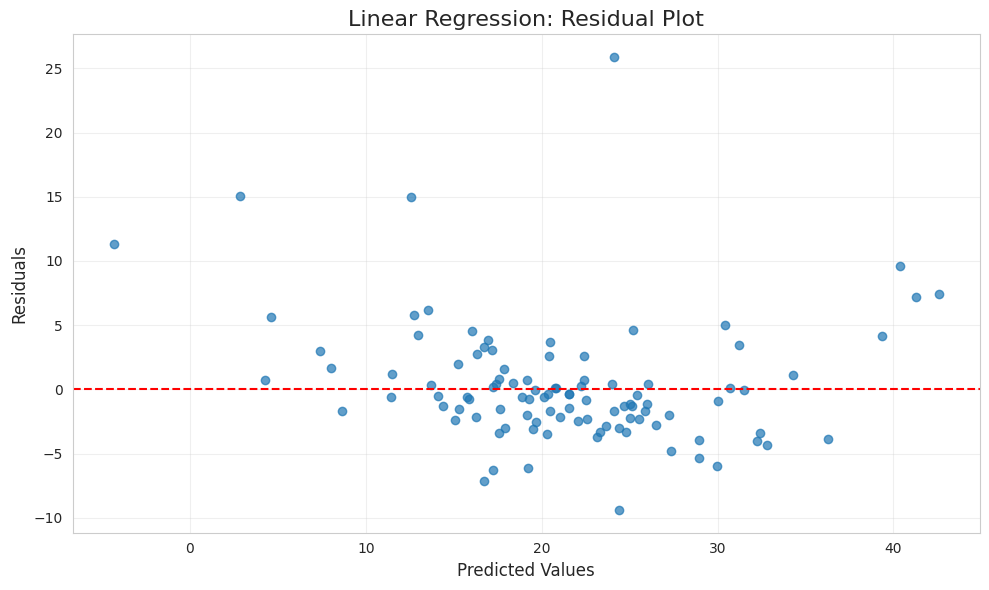

In [25]:
# Plot residuals
residuals = y_test - lr_predictions
plt.figure(figsize=(10, 6))
plt.scatter(lr_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Linear Regression: Residual Plot', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 🧮 Linear Regression Explanation

Linear regression works by finding the **line** (or **hyperplane** in multiple dimensions) that best fits the data by minimizing the sum of squared differences between observed and predicted values.

---

#### 📊 Metrics Interpretation

- **MSE (Mean Squared Error)**:  
  Average of the squared differences between predicted and actual values. Lower is better.

- **RMSE (Root Mean Squared Error)**:  
  Square root of MSE, which brings the error metric back to the same scale as the target variable.  
  _Example_: RMSE of 5 means predictions are off by about **$5,000** on average.

- **MAE (Mean Absolute Error)**:  
  Average of the absolute differences between predicted and actual values.  
  Less sensitive to outliers than RMSE.

- **R² (R-squared)**:  
  Proportion of variance in the target variable explained by the model.  
  Ranges from 0 to 1. Higher = better fit.

---

#### 🔎 Coefficient Analysis

The coefficients tell us the **impact of each feature** on the target variable when all other features are held constant.

> _Example_: A coefficient of **3.5** for **RM** means that an increase of 1 (after scaling) in the average number of rooms is associated with an increase of **$3,500** in median house value, all else being equal.

---

#### 📈 Visualizations

- **Actual vs Predicted Plot**:  
  Ideally, points should fall along the diagonal line (y = x), indicating perfect predictions.  
  Deviations from this line represent prediction errors.

- **Residual Plot**:  
  Shows the difference between actual and predicted values (residuals) against the predicted values.  
  In a good model, residuals should be randomly scattered around **zero** with no clear pattern.


### Random Forest Regressor



Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions. It's known for its ability to handle non-linear relationships and interactions between features.


Random Forest Results:
Mean Squared Error (MSE): 8.0437
Root Mean Squared Error (RMSE): 2.8361
Mean Absolute Error (MAE): 2.0423
R-squared (R²): 0.8903

Random Forest Feature Importance (sorted):
    Feature  Importance
5        rm    0.504473
11    lstat    0.312732
7       dis    0.060598
0      crim    0.040851
10  ptratio    0.017454
9       tax    0.016670
4       nox    0.016024
6       age    0.014260
2     indus    0.007271
8       rad    0.006260
1        zn    0.001755
3      chas    0.001651


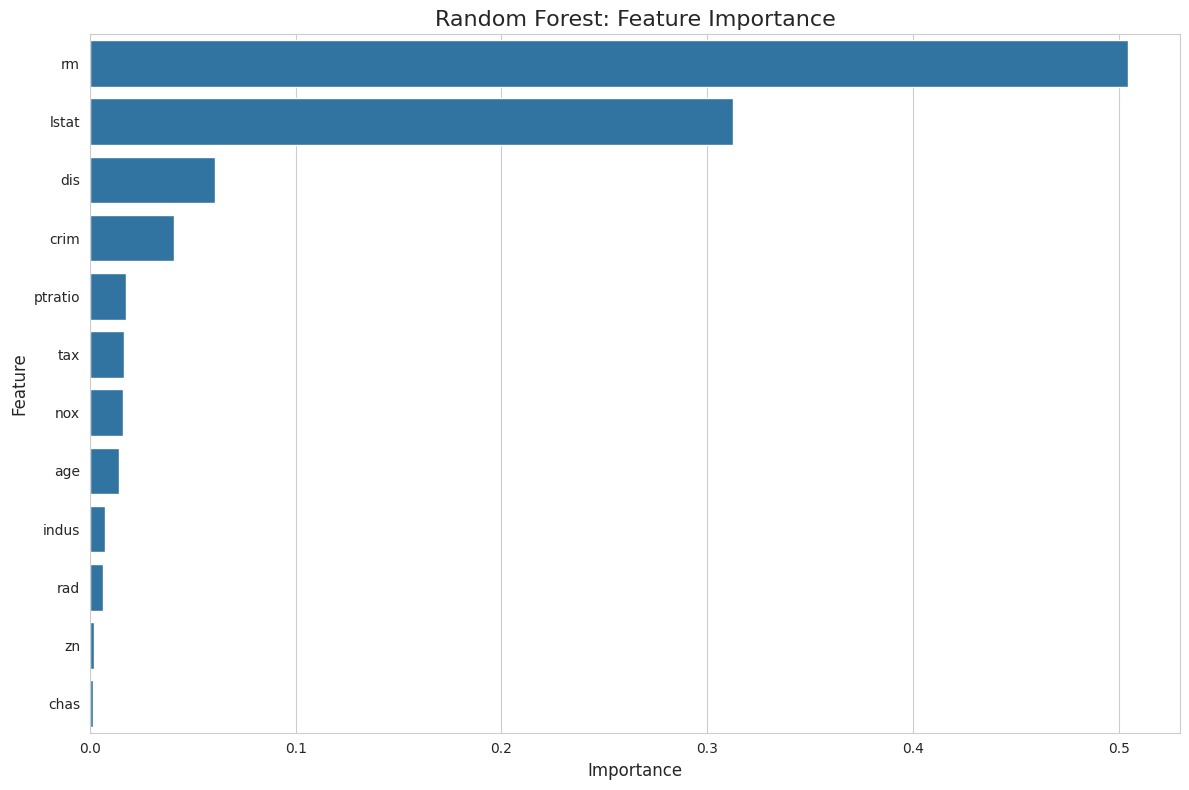

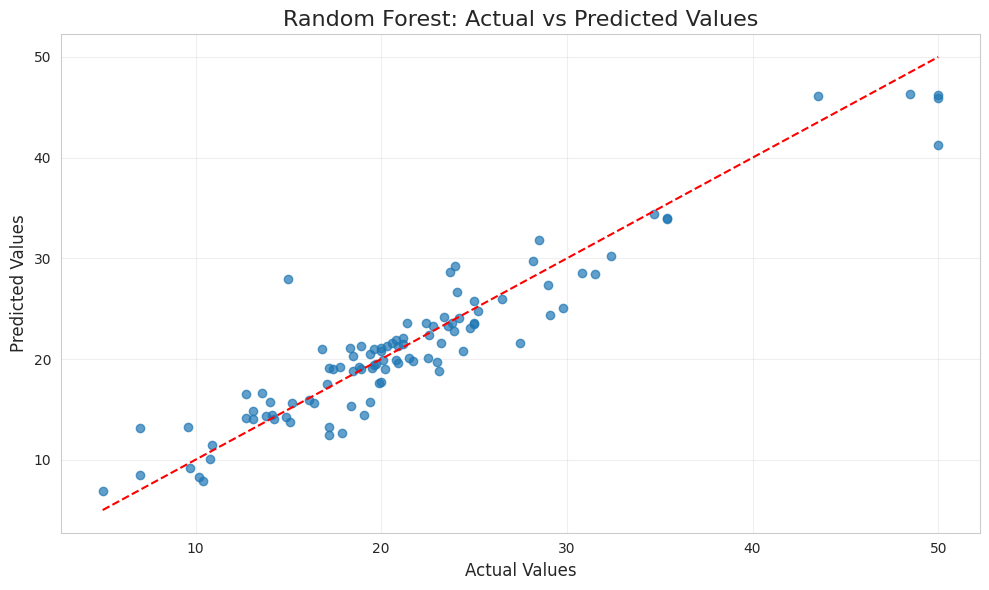

In [26]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Results:")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"R-squared (R²): {rf_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance (sorted):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest: Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Random Forest: Actual vs Predicted Values', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 🌳 Random Forest Explanation

Random Forest works by creating **multiple decision trees**, each trained on a **random subset** of the data and features. The final prediction is the **average** of the predictions from all trees.

This **ensemble approach** helps:
- Reduce **overfitting**
- Improve **generalization** on unseen data

---

#### ⚙️ Key Parameters

- **n_estimators**:  
  Number of trees in the forest. (In this tutorial, we used **100**)

- **random_state**:  
  Seed for random number generation, ensuring **reproducibility** of results

---

#### 🌟 Feature Importance

One major advantage of Random Forest is that it provides **feature importance** values, which tell us:

> _How much each feature contributes to reducing prediction error (impurity) across all trees._

This importance is computed based on how much each feature **reduces variance** (in regression problems).

---

#### 📊 Visualization Insight

By visualizing feature importances, we can clearly see:

- Which features most strongly influence the model's predictions
- Which features may be less relevant (and possibly removed for simpler models)

These insights are valuable for:
- Model interpretability
- Feature selection
- Business decision-making


### Gradient Boosting Regressor
Gradient Boosting is another ensemble method that builds trees sequentially, with each tree trying to correct the errors made by the previous ones.#


Gradient Boosting Results:
Mean Squared Error (MSE): 6.2300
Root Mean Squared Error (RMSE): 2.4960
Mean Absolute Error (MAE): 1.9045
R-squared (R²): 0.9150

Gradient Boosting Feature Importance (sorted):
    Feature  Importance
5        rm    0.418837
11    lstat    0.379487
7       dis    0.073428
4       nox    0.035007
10  ptratio    0.030723
0      crim    0.028486
6       age    0.014676
9       tax    0.012432
2     indus    0.004217
8       rad    0.002390
1        zn    0.000282
3      chas    0.000035


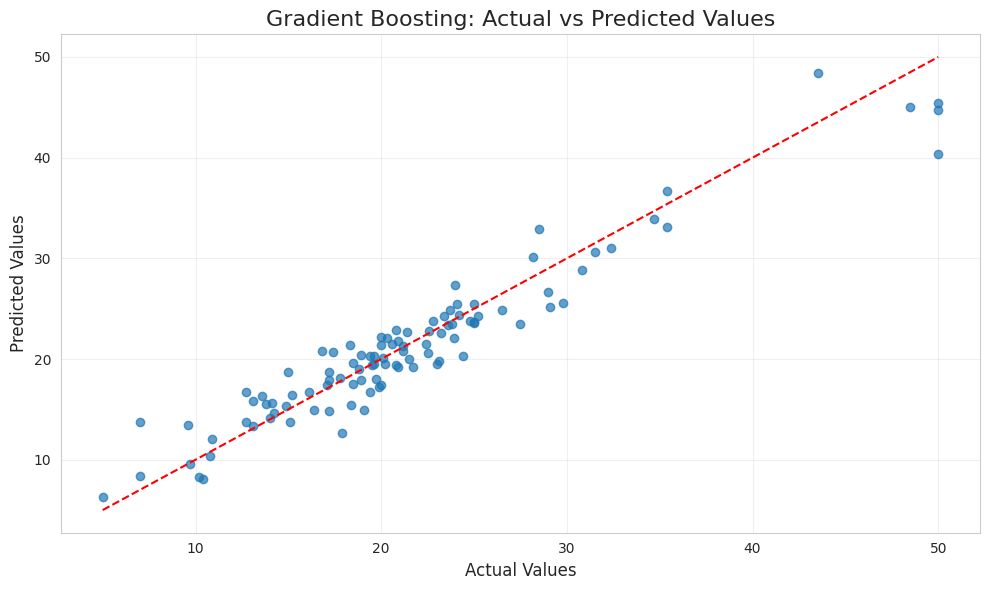

In [27]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("\nGradient Boosting Results:")
print(f"Mean Squared Error (MSE): {gb_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.4f}")
print(f"R-squared (R²): {gb_r2:.4f}")

# Feature importance
gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Feature Importance (sorted):")
print(gb_feature_importance)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Gradient Boosting: Actual vs Predicted Values', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 🚀 Gradient Boosting Explanation

**Gradient Boosting** builds decision trees **sequentially**, where each new tree is trained to **correct the errors** made by the combined previous trees.

This **boosting** process allows the model to improve iteratively and can result in **highly accurate predictions** — but it also requires **careful tuning** to prevent overfitting.

---

#### ⚙️ Key Parameters

- **n_estimators**:  
  Number of boosting stages (i.e., total number of trees)

- **learning_rate**:  
  Controls how much each tree contributes to the final prediction.  
  Smaller values mean:
  - Slower learning
  - Often more **accurate**, but may require more trees

---

#### 🌟 Feature Importance

Like Random Forest, Gradient Boosting models also provide **feature importance** scores. These scores help us understand:

> _Which features have the most influence on the model’s predictions._

This gives us an **additional perspective** on which factors are driving house prices.

---

#### 💡 When to Use Gradient Boosting?

Gradient Boosting is great when:
- You need high accuracy
- You can afford longer training time
- You are okay with a bit of hyperparameter tuning for best results


##Model Evaluation
Now let's compare the performance of all three models to identify the best one for our task


Model Comparison:
               Model        MSE      RMSE       MAE        R²
0  Linear Regression  22.777709  4.772600  3.111377  0.689397
1      Random Forest   8.043656  2.836134  2.042275  0.890314
2  Gradient Boosting   6.229970  2.495991  1.904525  0.915046


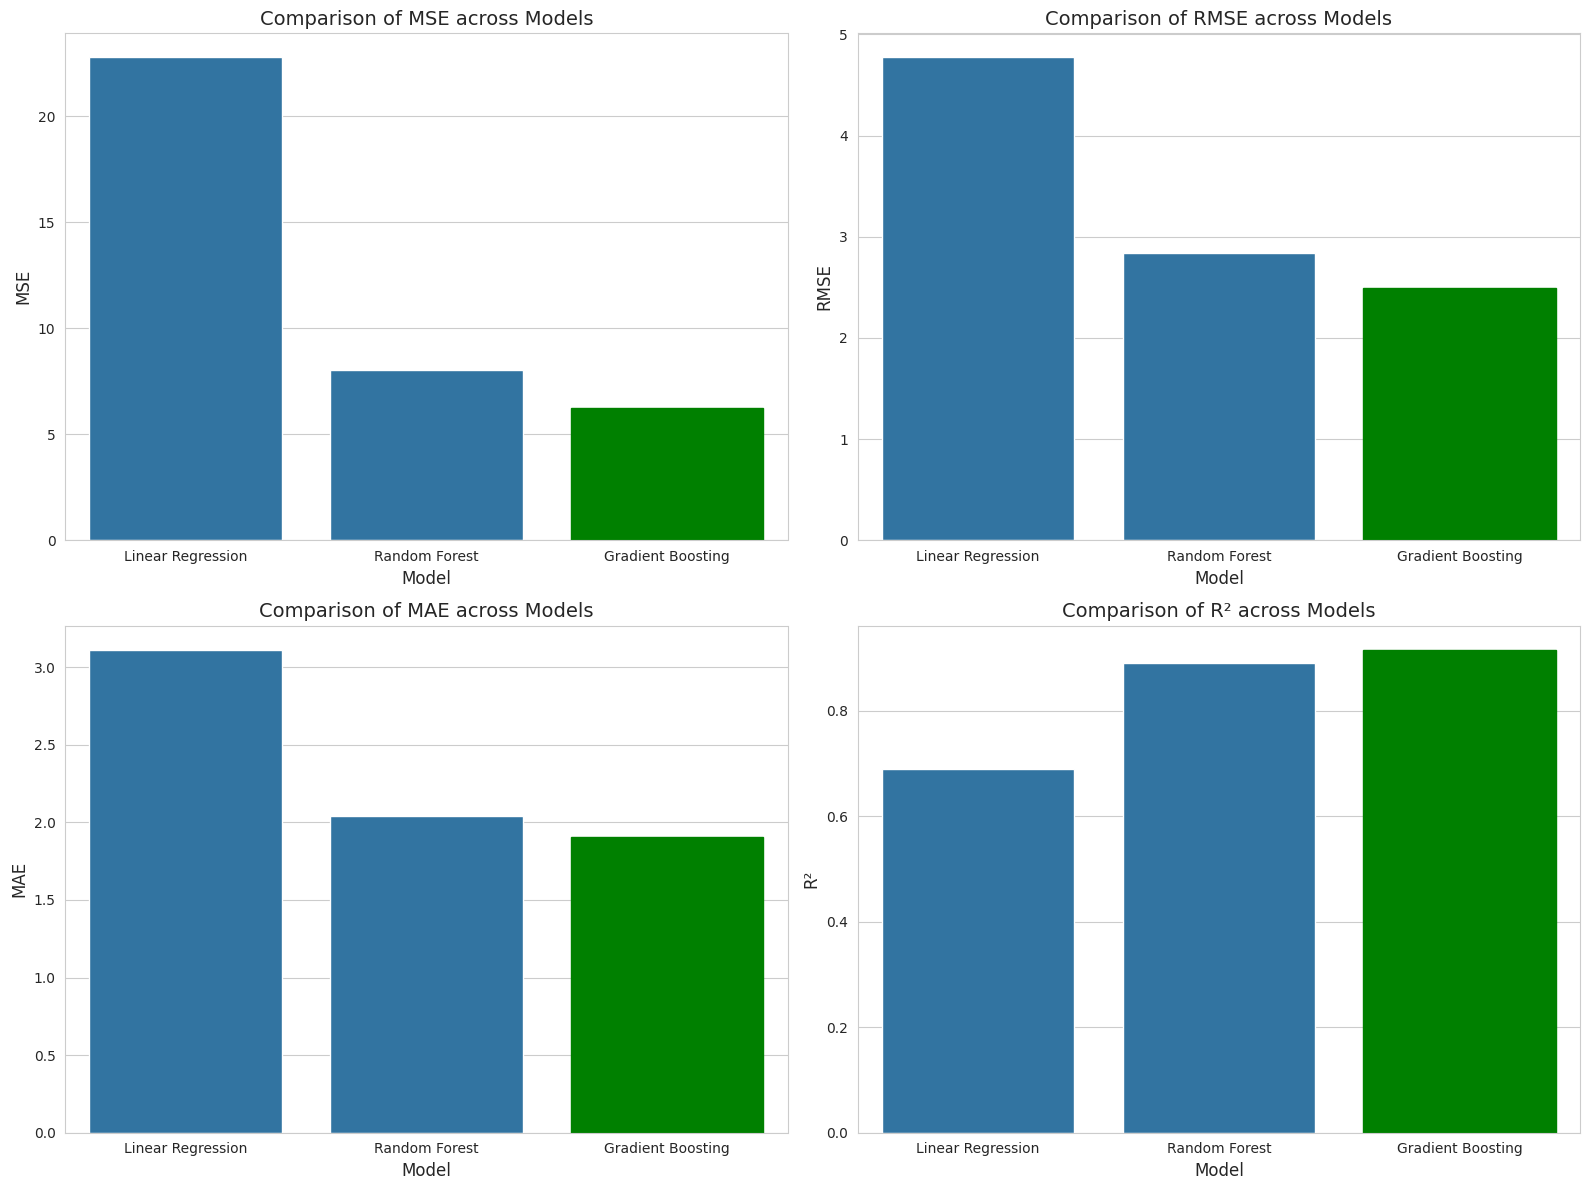

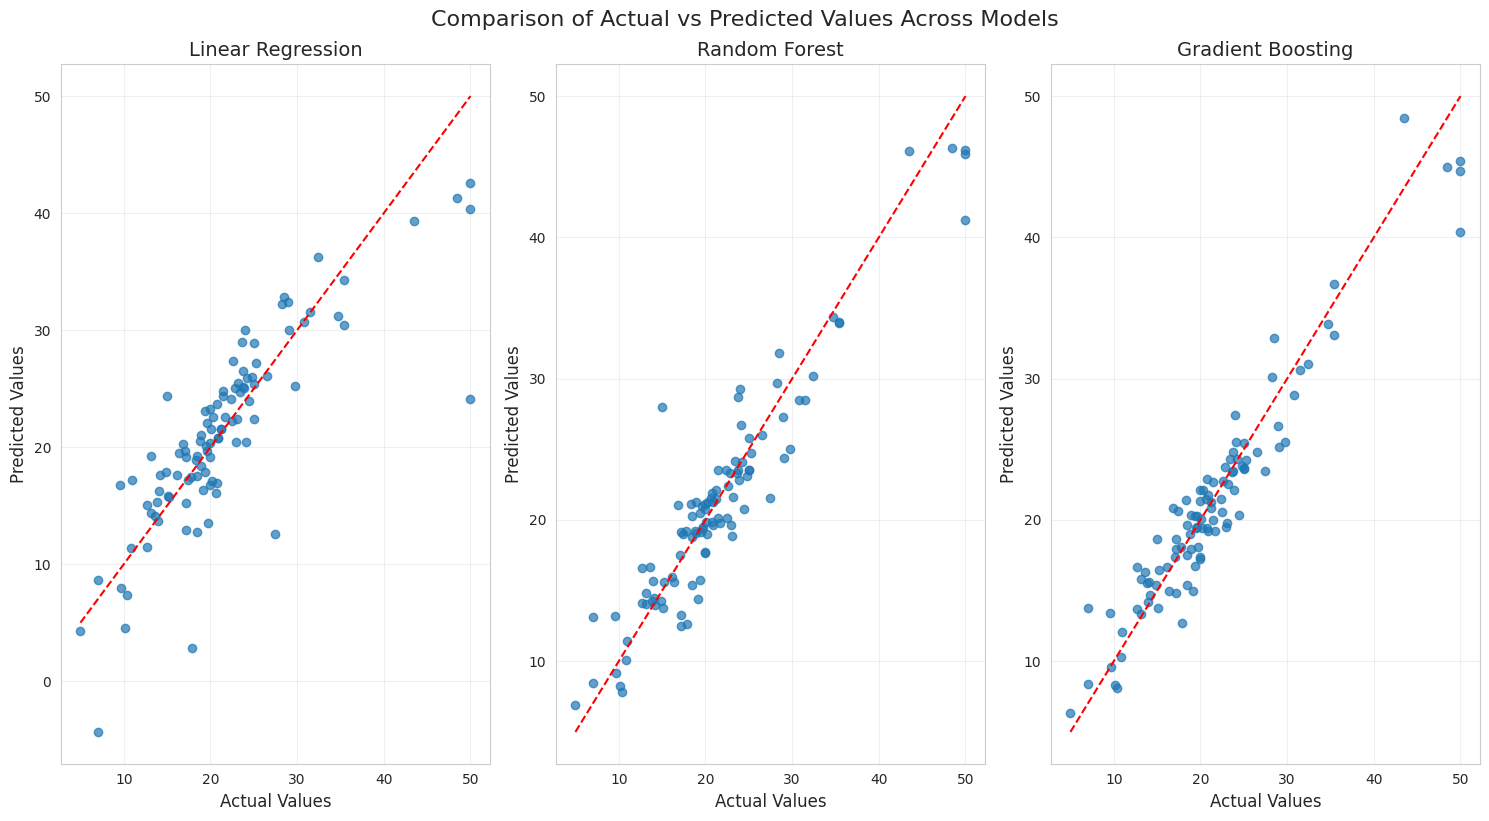

In [28]:
# Collect results in a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_mse, rf_mse, gb_mse],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse],
    'MAE': [lr_mae, rf_mae, gb_mae],
    'R²': [lr_r2, rf_r2, gb_r2]
})

print("\nModel Comparison:")
print(results)

# Plot the comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

metrics = ['MSE', 'RMSE', 'MAE', 'R²']
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results, ax=axes[i])
    axes[i].set_title(f'Comparison of {metric} across Models', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    # For R², higher is better, so a different color scheme makes sense
    if metric == 'R²':
        for j, bar in enumerate(axes[i].patches):
            if j == results['R²'].idxmax():
                bar.set_color('green')
    else:
        # For error metrics, lower is better
        for j, bar in enumerate(axes[i].patches):
            if j == results[metric].idxmin():
                bar.set_color('green')

plt.tight_layout()
plt.show()

# Create a combined plot of actual vs predicted for all models
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Linear Regression', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Random Forest', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(y_test, gb_predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Gradient Boosting', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparison of Actual vs Predicted Values Across Models', y=1.02, fontsize=16)
plt.show()

#### 📏 Performance Metrics

We evaluate and compare our models using the following **four key metrics**:

- **MSE (Mean Squared Error)**  
  Average of squared differences between predicted and actual values.  
  ➤ Squaring the errors gives more weight to **larger errors**.

- **RMSE (Root Mean Squared Error)**  
  Square root of MSE, which brings the error back to the same scale as the target variable.  
  ➤ _Example_: RMSE of 4 means predictions are off by about **$4,000** on average.

- **MAE (Mean Absolute Error)**  
  Average of the absolute differences between predicted and actual values.  
  ➤ Less sensitive to outliers than RMSE.

- **R² (R-squared / Coefficient of Determination)**  
  Proportion of variance in the target variable that is explained by the model.  
  ➤ Ranges from 0 to 1 — **higher is better**.

---

#### 📊 Comparing Model Performance

Based on the evaluation metrics:

- **Random Forest** and **Gradient Boosting** often outperform **Linear Regression**  
  ➤ Especially on datasets with **non-linear relationships**, like the Boston Housing data.

Visualizations such as **bar charts** and **scatter plots** help us understand the comparison:

##### ✅ Interpretation:

- **MSE**, **RMSE**, and **MAE**:  
  ➤ **Lower** values indicate better performance

- **R² (R-squared)**:  
  ➤ **Higher** value indicates a better fit

##### 📈 Scatter Plot Insights:

- The closer the points are to the **diagonal line (y = x)**, the **more accurate** the predictions.
- These plots help visually assess which model produces predictions closer to the true values.

---

📌 Use these insights to choose the best-performing model for deployment or further tuning.


## Feature Importance Analysis
Let's compare the feature importance across our tree-based models (Random Forest and Gradient Boosting) to see which features are most influential in predicting house prices.

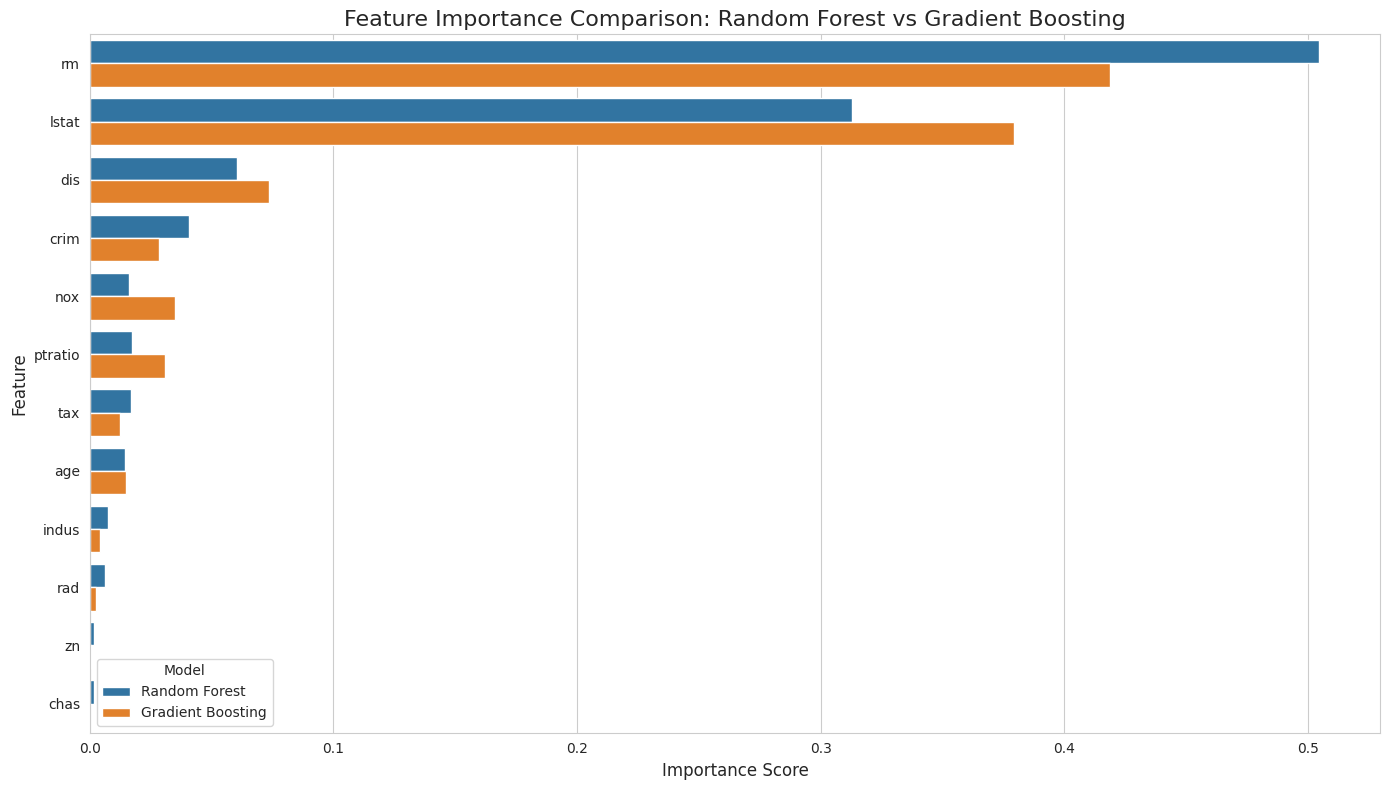

In [29]:
# Compare feature importance between Random Forest and Gradient Boosting
feature_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_model.feature_importances_,
    'Gradient Boosting': gb_model.feature_importances_
})

# Melt the DataFrame for easier plotting
feature_comparison_melted = pd.melt(feature_comparison,
                                    id_vars='Feature',
                                    var_name='Model',
                                    value_name='Importance')

# Sort by overall importance
feature_order = feature_comparison.set_index('Feature').sum(axis=1).sort_values(ascending=False).index

# Plot feature importance comparison
plt.figure(figsize=(14, 8))
sns.barplot(data=feature_comparison_melted,
            x='Importance',
            y='Feature',
            hue='Model',
            order=feature_order)
plt.title('Feature Importance Comparison: Random Forest vs Gradient Boosting', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


## Conclusion: Building a Machine Learning Model from Start to Finish

In this tutorial, we walked through the **end-to-end process** of building machine learning models using the **Boston Housing dataset** — a classic regression problem.

We covered every critical step:

✅ **Data Understanding**: Explored the structure, distributions, and relationships in the dataset  
✅ **Preprocessing**: Cleaned, scaled, and split the data for training/testing  
✅ **Model Training**: Built models using Linear Regression, Random Forest, and Gradient Boosting  
✅ **Evaluation**: Compared models using robust performance metrics and visualizations  
✅ **Interpretability**: Investigated feature importance to understand what drives predictions

---

#### 🧠 Key Takeaways

- **Linear Regression** provides a baseline and is highly interpretable but limited to linear relationships.
- **Random Forest** and **Gradient Boosting** offer more powerful predictions by capturing complex, non-linear patterns in the data.
- **Feature Importance** analysis helps make informed decisions and explainability easier for stakeholders.
- **Visualization** is essential for spotting trends, anomalies, and model behavior.

---

#### 🚀 Next Steps

- Try **hyperparameter tuning** using GridSearchCV or RandomizedSearchCV  
- Test additional models (e.g., XGBoost, SVR, Lasso, Ridge)  
- Apply **cross-validation** for more robust performance estimates  
- Explore **model deployment** (e.g., using Flask, Streamlit, or FastAPI)

Machine learning is an **iterative** process — with every new dataset, the goal remains the same:  
**build models that not only perform well but also provide meaningful insights.**

Happy learning! 🎓✨


In [30]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
!cp content/drive/MyDrive/Colab Notebooks/Comprehensive Machine Learning Tutorial: Boston Housing Price Prediction ./

cp: cannot stat 'content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/Comprehensive': No such file or directory
cp: cannot stat 'Machine': No such file or directory
cp: cannot stat 'Learning': No such file or directory
cp: cannot stat 'Tutorial:': No such file or directory
cp: cannot stat 'Boston': No such file or directory
cp: cannot stat 'Housing': No such file or directory
cp: cannot stat 'Price': No such file or directory
cp: cannot stat 'Prediction': No such file or directory


In [33]:
!jupyter nbconvert --to PDF "Comprehensive Machine Learning Tutorial: Boston Housing Price Prediction"

[NbConvertApp] WARNING | pattern 'Comprehensive Machine Learning Tutorial: Boston Housing Price Prediction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
  